## 선형회귀

$\hat Y=h_{\theta}(x)=\theta \cdot X$

선형 회귀모델의 손실(비용)함수

$MSE(X,h_{\theta})=\frac{1}{m} \sum_{i=1}^{m} (\theta^{T}x^{(i)}-y^{(i)})^2$

### Step 1. 정규방정식
$\theta$ 를 구하는 해석적인 방법이 있다. 아래의 정규방정식을 보자

$\hat \theta=(X^T X)^{-1} X^T y$

-------

실제로 구해보자

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
data=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\공부파일들\데이콘\서울시 기후예측\train.csv")

In [6]:
data.head(3)

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0


In [35]:
import sklearn.linear_model as sklin
import sklearn.pipeline as skpip
import sklearn.impute as skimp
import sklearn.preprocessing as skpre
import sklearn.compose as skcom

In [38]:
nan_data=data.copy()
nan_data.dropna(axis=0,inplace=True)

In [42]:
linear_model=sklin.LinearRegression(n_jobs=3)
linear_model.fit(X=nan_data[["최고기온"]],y=nan_data["평균기온"])

LinearRegression(n_jobs=3)

C:\Users\SAMSUNG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


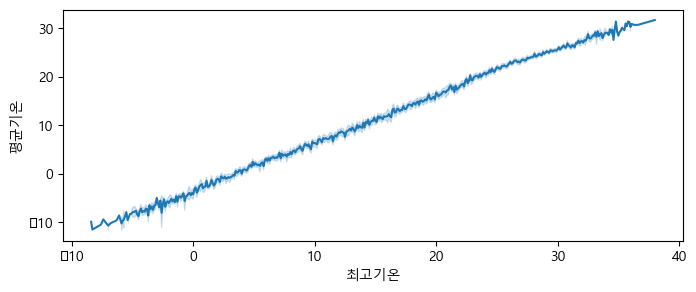

In [46]:
# 분포 확인
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"
plt.figure(figsize=(8,3))
sb.lineplot(x=nan_data["최고기온"],y=nan_data["평균기온"])
plt.show()
plt.close()

In [50]:
print("가중치:",linear_model.coef_)
print("편향:",linear_model.intercept_)

가중치: [0.98368706]
편향: -3.442945894643888


* 참고          
수학적으로 역행렬이 존재하지 않는 경우 행렬방정식을 풀 수 없다.         
따라서 우리는 유사역행렬을 이용해서 근사해를 구하게 되는데 아래와 같다

In [57]:
linear_model.predict(X=nan_data[["최고기온"]])

array([ 3.44286356, -6.19726967,  0.98364589, ..., -1.37720306,
       -1.18046565, -1.37720306])

In [65]:
import statsmodels.api as sm
np.linalg.lstsq(a=sm.add_constant(nan_data["최고기온"]),b=nan_data["평균기온"],rcond=1e-6)

(array([-3.44294589,  0.98368706]),
 array([15321.25740897]),
 2,
 array([1730.28187305,   41.14583579]))

위와 같이 일반적으로 그냥 풀 수 있다

In [66]:
np.linalg.pinv(sm.add_constant(nan_data["최고기온"]))@nan_data["평균기온"]

array([-3.44294589,  0.98368706])

유사 역행렬 : 행렬분해를 통해 얻는 것 -> 선형대수학 참고

--------